# White Noise

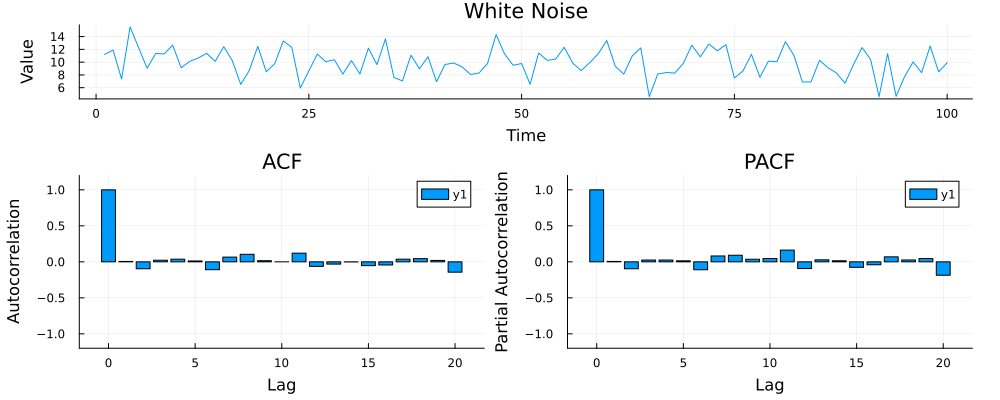

In [12]:
using TimeSeriesKit
using StatsBase
using Plots

# Model White Noise
wn = WhiteNoise(100; mean=10, variance=5.0)
plot_acf_pacf(wn)

# Stationary AR Process

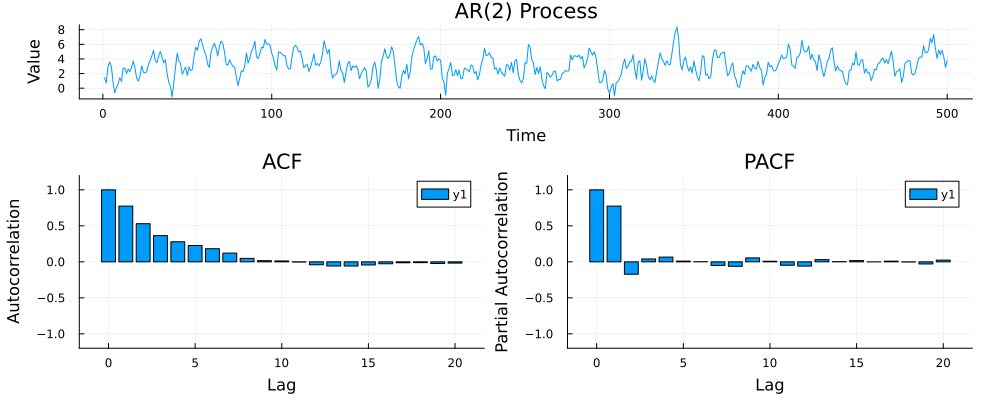

In [13]:
# AR(2) process: φ1 = 0.9, φ2 = -0.2, constant = -2.0 → X_t = -1.0 + 0.9*X_{t-1} - 0.2*X_{t-2} + ε_t
# Characteristic polynomial: 1 - 0.9*z + 0.2*z^2
# Roots: z1 = 2.5, z2 = 2.0 (both > 1)
# ⇒ process is stationary

ts = ARProcess(500, phi=[0.9, -0.2], constant=1.0)
plot_acf_pacf(ts)

We can see that AR(2) has two significant lags in the PACF plot.

# MA Process

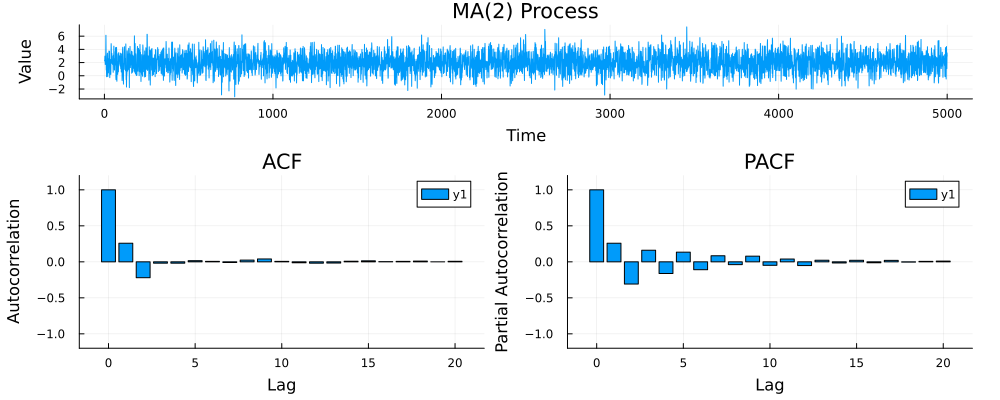

In [14]:
ts = MAProcess(5000, theta=[0.9, -0.4], mean=2.0)
plot_acf_pacf(ts, lags=20)

# Integration of White Noise

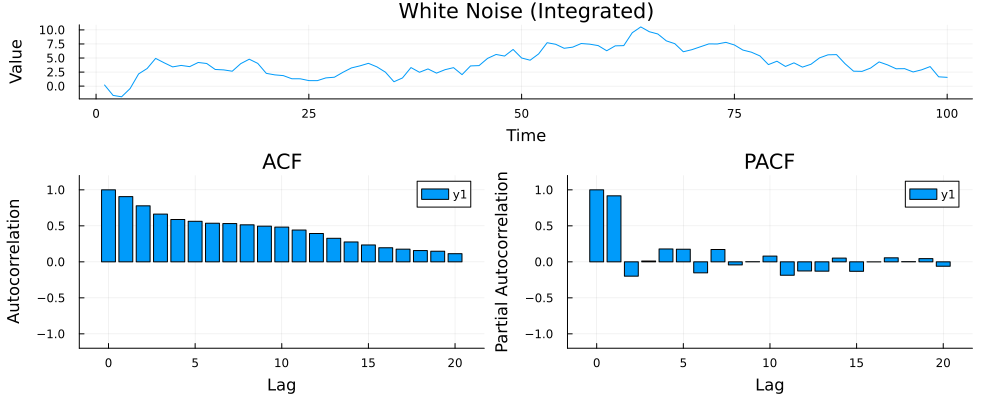

In [15]:
# Integrate White Noise to get Random Walk
# i.e., X_t = ε_t → Y_t = Σ ε_i = ε_t + ε_{t-1} + ... + ε_1 = ε_t  + Y_{t-1}
ts = WhiteNoise(100; mean=0, variance=1.0)
ts_int = integrate(ts; order=1)
plot_acf_pacf(ts_int)

# Differentiation of Random Walk

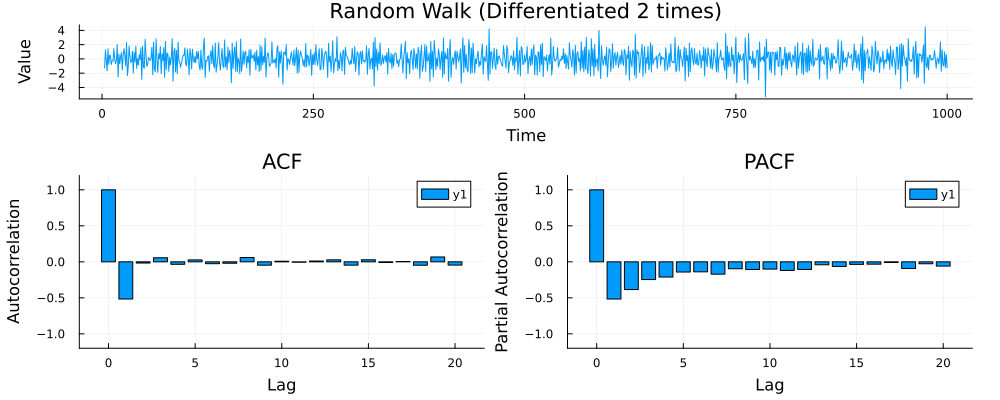

In [ ]:
# Differentiate Random Walk to get White Noise
# i.e., X_t = X_{t-1} + ε_t → Y_t = X_t - X_{t-1} = X_{t-1} + ε_t - X_{t-1} = ε_t
rw = RandomWalk(1000; variance=1.0)
ts_diff = differentiate(rw; order=2)
plot_acf_pacf(ts_diff)